# 导入依赖库

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 数据

In [2]:
X, y = make_classification(n_samples=5000, weights=[0.02, 0.98], random_state=0, n_clusters_per_class=1)

In [3]:
# 1的个数为4871，0的个数为129
np.sum(y)

4871

# 划分数据

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y会确保分割中有2%的0和98%的1

# 不对非均衡数据集做处理

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [8]:
print("F1 Score is ", f1_score(y_test, clf.predict(X_test)))
print("Accuracy Score is ", accuracy_score(y_test, clf.predict(X_test)))

F1 Score is  0.9868287740628165
Accuracy Score is  0.974


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


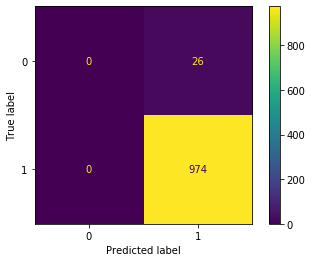

In [9]:
fig=plot_confusion_matrix(clf, X_test, y_test)
plt.show()

在不对非均衡数据集处理时，尽管F1-score和accuracy非常高，但是却把所有的0都预测成了1.<br>
在检测罕见的欺诈行为或预测不常见的恶性疾病的情况下，这种错误分类预测是非常不利的。

# 通过weight进行调整

我们的数据中，1类是0类的38倍，可以通过这个来调整他们的权重

In [13]:
weighted_clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight={0:38,1:1})
weighted_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 38, 1: 1}, max_depth=2, random_state=0)

In [14]:
print("F1 Score is ", f1_score(y_test, weighted_clf.predict(X_test)))
print("Accuracy Score is ", accuracy_score(y_test, weighted_clf.predict(X_test)))

F1 Score is  0.9928057553956834
Accuracy Score is  0.986


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


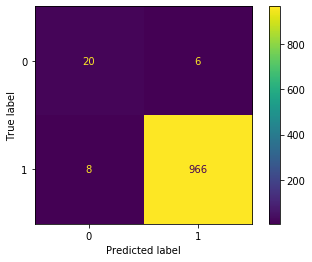

In [15]:
fig=plot_confusion_matrix(weighted_clf, X_test, y_test)
plt.show()

与未做处理相比，现在已经将20个0类正确划分了

# 通过oversampling来处理非平衡数据集

In [18]:
from imblearn.over_sampling import RandomOverSampler

In [19]:
ros = RandomOverSampler(random_state=0)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)
print("Number of records for X_train is ", X_train.shape)
print("Number of records for X_resampled oversampling is ",X_resampled.shape)

Number of records for X_train is  (4000, 20)
Number of records for X_resampled oversampling is  (7794, 20)


In [21]:
# class 1占据了50%
np.sum(y_train)

3897

In [22]:
oclf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_resampled, y_resampled)


In [23]:
print("F1 Score is ", f1_score(y_test, oclf.predict(X_test)))
print("Accuracy Score is ", accuracy_score(y_test, oclf.predict(X_test)))

F1 Score is  0.9922879177377891
Accuracy Score is  0.985


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


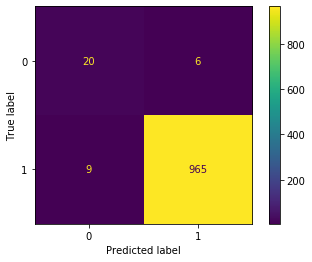

In [24]:
fig=plot_confusion_matrix(oclf, X_test, y_test)
plt.show()

经过oversampling的处理后，只将6个0 class预测成为了1

# 通过undersampling来处理非平衡数据集

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print("Number of records for X_train is ", X_train.shape)
print("Number of records for X_resampled undersampling is ",X_resampled.shape)

Number of records for X_train is  (4000, 20)
Number of records for X_resampled undersampling is  (206, 20)


In [26]:
uclf=RandomForestClassifier(max_depth=2,
random_state=0).fit(X_resampled, y_resampled)

In [28]:
print("F1 Score is ", f1_score(y_test, uclf.predict(X_test)))
print("Accuracy Score is ", accuracy_score(y_test, uclf.predict(X_test)))

F1 Score is  0.952991452991453
Accuracy Score is  0.912


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


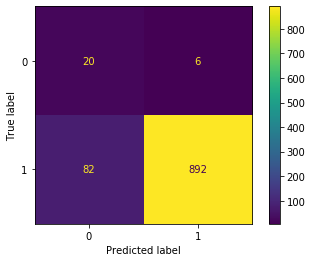

In [27]:
fig=plot_confusion_matrix(uclf, X_test, y_test)
plt.show()

通过与上面几种方式对比，这种方式对class 1的预测错误有所上升。<br>
数据是非常有价值的。我不喜欢低取样策略，因为它强迫修剪与多数人类别相关的数据。我们看到，由于这个原因，即使模型可以预测少数人类别的记录，其准确度几乎与本文讨论的其他策略相同，但在预测多数人类别的记录方面表现糟糕。

